In [105]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
data =  pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1',low_memory=False)

In [107]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [108]:
for i in data.columns:
    print(i,end=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

### we need only important columns

In [109]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [110]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [111]:
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [112]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [113]:
data['Killed']=data['Killed'].fillna(0)
data['Wounded']=data['Wounded'].fillna(0)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  float64
 11  Wounded      181691 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [115]:
data=data.dropna(axis = 0)

In [116]:
data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
11,1970,1,6,United States,Colorado,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
14,1970,1,9,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,12,30,India,Kerala,South Asia,Koothuparamba,11.831902,75.565432,Bombing/Explosion,0.0,0.0,Koothuparamba Police Station,12/30/2017: Assailants threw an explosive devi...,Unknown,Police,Explosives,"The specific motive is unknown; however, sourc..."
181665,2017,12,30,India,Chhattisgarh,South Asia,Toylanka,18.802725,81.497666,Facility/Infrastructure Attack,0.0,0.0,Road Construction Site,12/30/2017: Assailants set fire to seven vehic...,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms,"The specific motive is unknown; however, sourc..."
181672,2017,12,31,India,Jammu and Kashmir,South Asia,Lethapora,33.966527,74.964225,Armed Assault,8.0,3.0,Camp,12/31/2017: Assailants armed with grenades and...,Jaish-e-Mohammad (JeM),Police,Explosives,"The specific motive is unknown; however, sourc..."
181682,2017,12,31,Italy,Marche,Western Europe,Spinetoli,42.888982,13.772795,Facility/Infrastructure Attack,0.0,0.0,Migrant Center,12/31/2017: Assailants set fire to a migrants'...,Unknown,Private Citizens & Property,Incendiary,"The specific motive is unknown; however, sourc..."


In [117]:
data['Day']=data['Day'].replace(0,np.nan).dropna(axis=0,how="all")

In [118]:
data['Month']=data['Month'].replace(0,np.nan).dropna(axis=0,how="all")

In [119]:
data=data.dropna(subset=['Day'])
data=data.dropna(subset=['Month'])
data=data.dropna(subset=['Year'])

In [120]:
data['Date']=data.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

In [121]:
data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
Date           0
dtype: int64

In [122]:
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Date
5,1970,1,1.0,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1970-01-01
8,1970,1,2.0,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1970-01-02
9,1970,1,3.0,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1970-01-03
11,1970,1,6.0,United States,Colorado,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,1970-01-06
14,1970,1,9.0,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,1970-01-09


In [123]:
data=data.reset_index()

In [124]:
data=data.drop(['index'], axis=1)

In [125]:
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Date
0,1970,1,1.0,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1970-01-01
1,1970,1,2.0,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1970-01-02
2,1970,1,3.0,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1970-01-03
3,1970,1,6.0,United States,Colorado,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,1970-01-06
4,1970,1,9.0,United States,Puerto Rico,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,1970-01-09


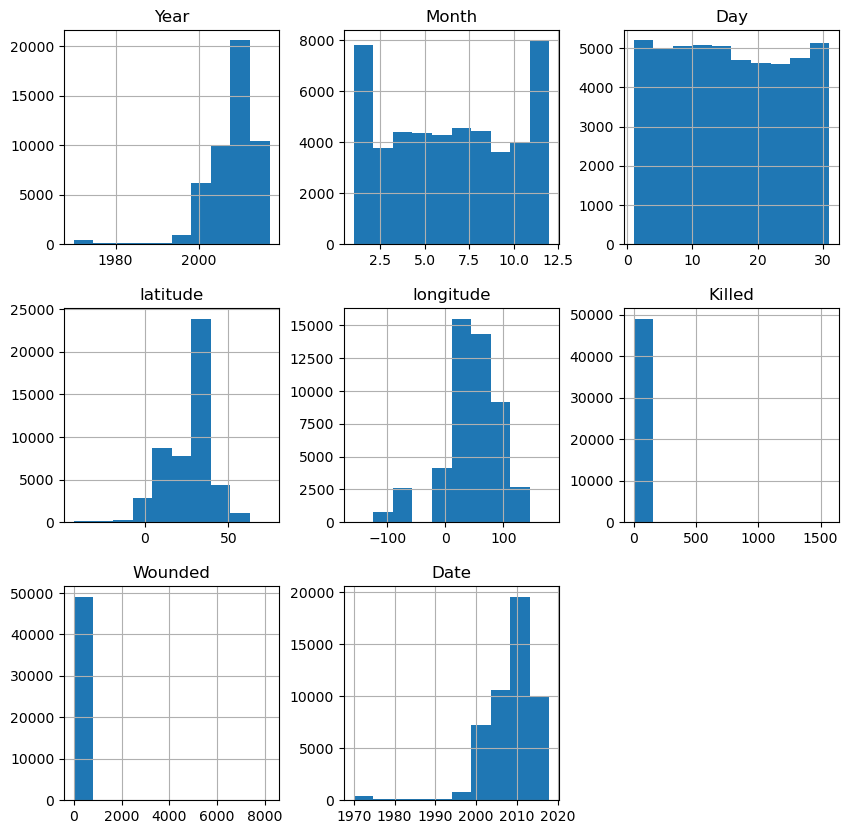

In [126]:
data.hist(figsize=(10, 10))
plt.show()

In [127]:
data.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.004981,0.014266,-0.105315,0.398572,0.004376,-0.009283
Month,0.004981,1.000000,0.009985,0.001421,0.004067,0.004105,0.007532
Day,0.014266,0.009985,1.000000,0.007081,0.004350,-0.008372,-0.004224
latitude,-0.105315,0.001421,0.007081,1.000000,-0.151794,-0.005373,0.012624
longitude,0.398572,0.004067,0.004350,-0.151794,1.000000,-0.012423,-0.011845
Killed,0.004376,0.004105,-0.008372,-0.005373,-0.012423,1.000000,0.602856
Wounded,-0.009283,0.007532,-0.004224,0.012624,-0.011845,0.602856,1.000000


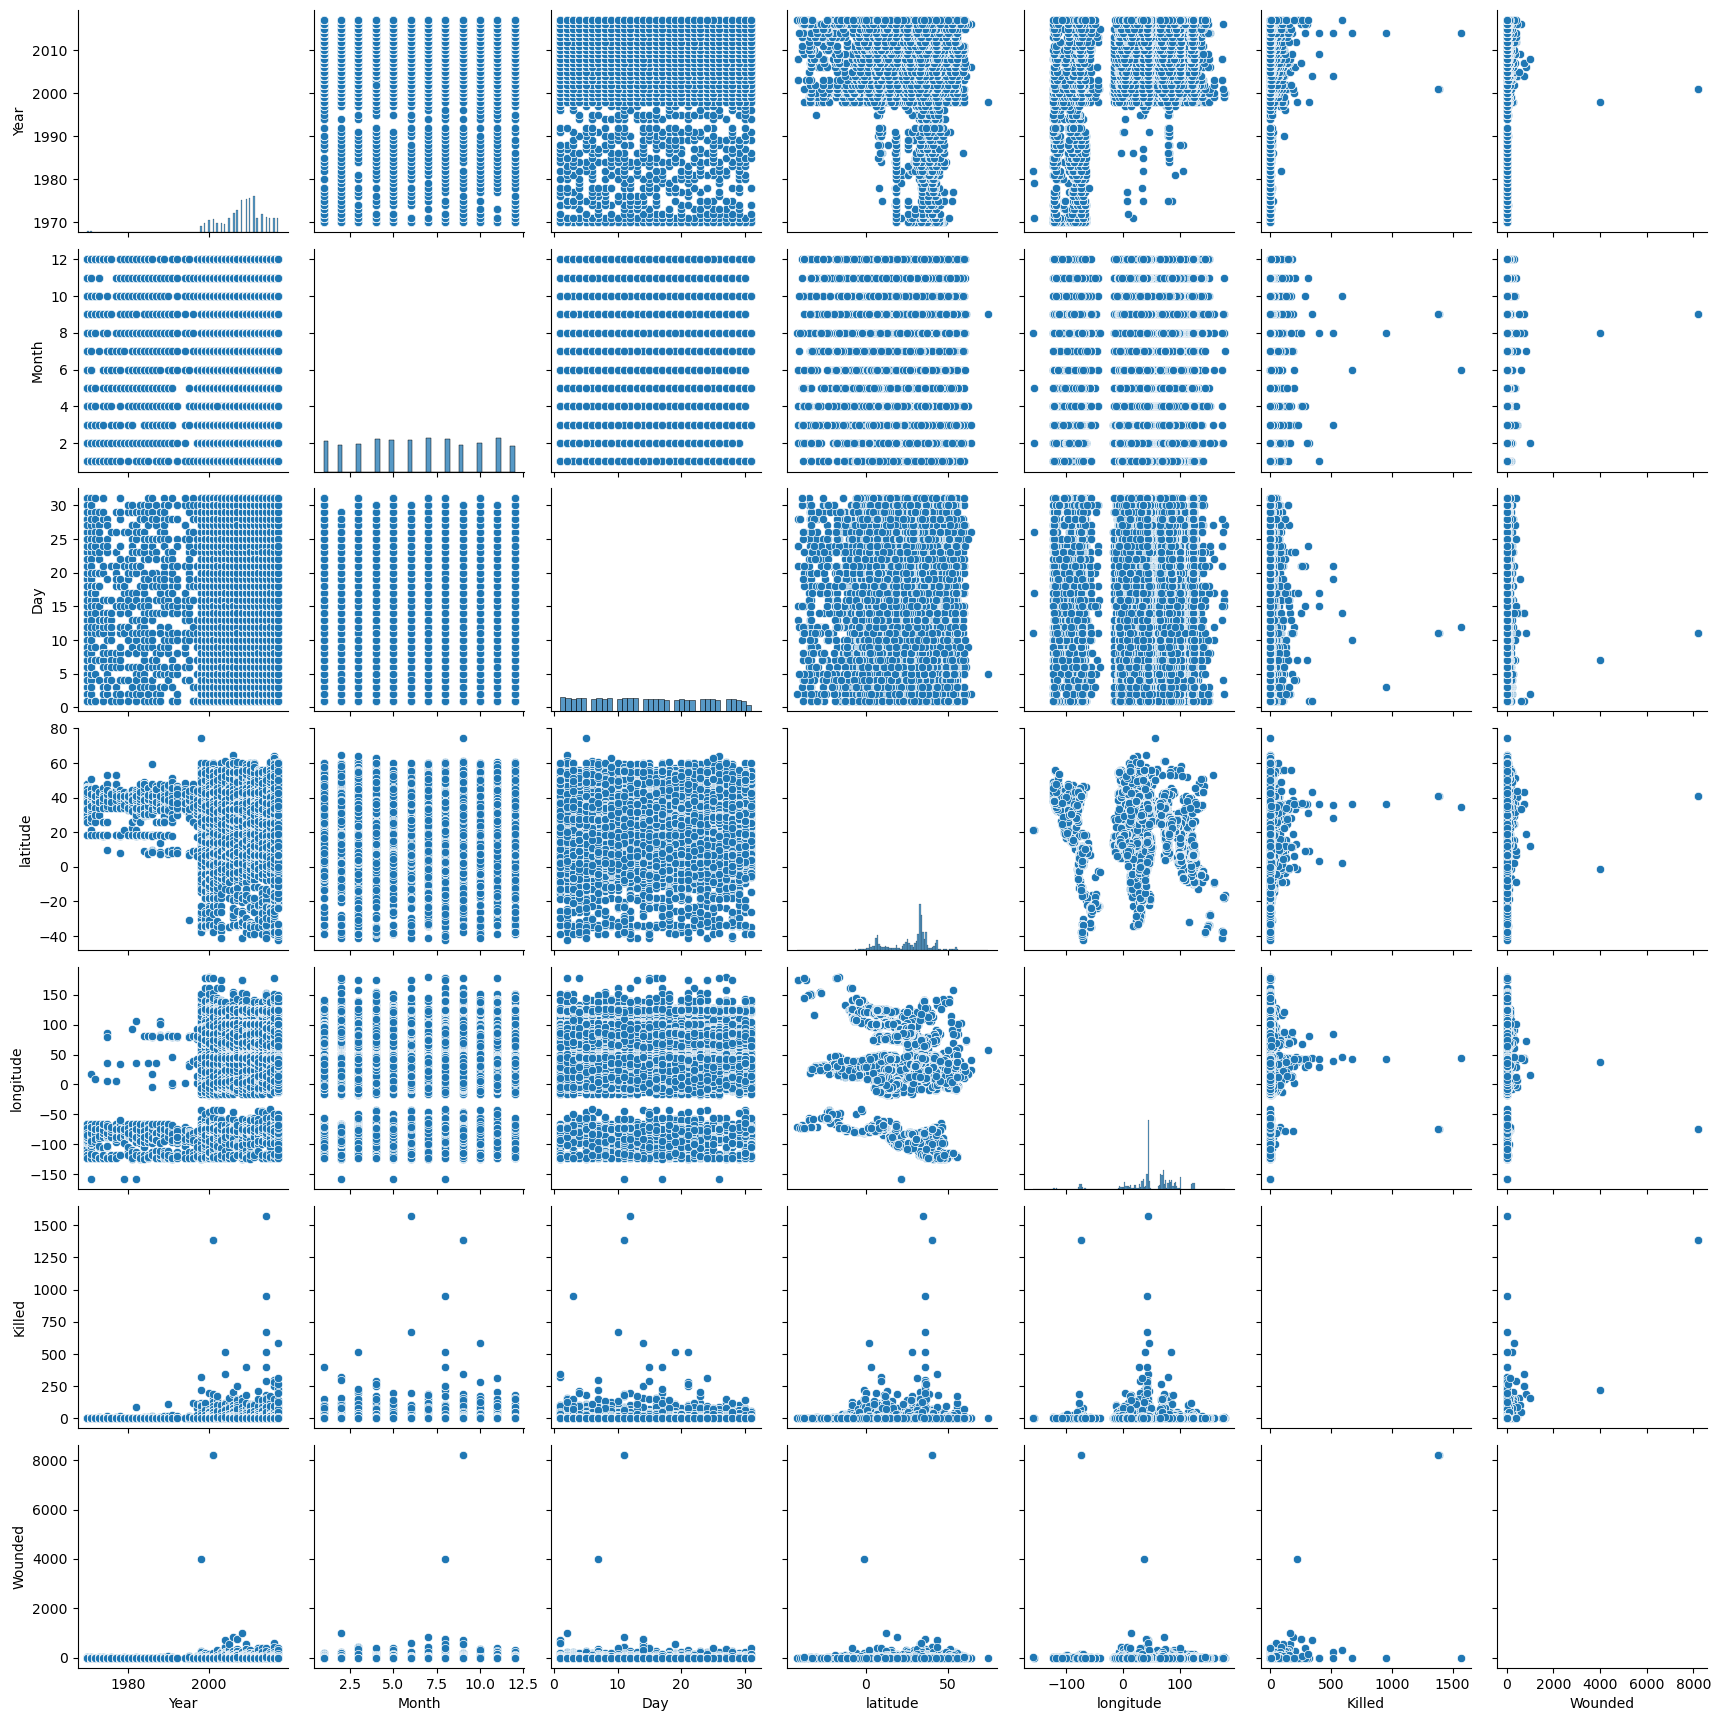

In [128]:
sns.pairplot(data)
plt.show()

In [129]:
attack = data.Country.value_counts()[:10]
attack

Iraq             9347
India            5652
Pakistan         4993
Afghanistan      3398
Philippines      2338
Thailand         1801
Russia           1545
Colombia         1465
United States    1441
Algeria          1391
Name: Country, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


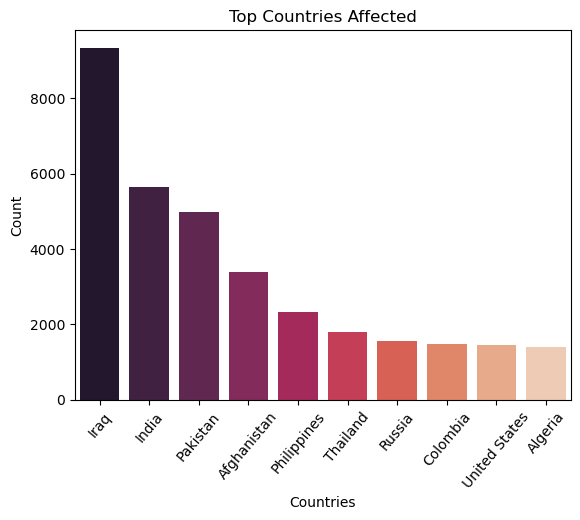

In [130]:
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='rocket')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

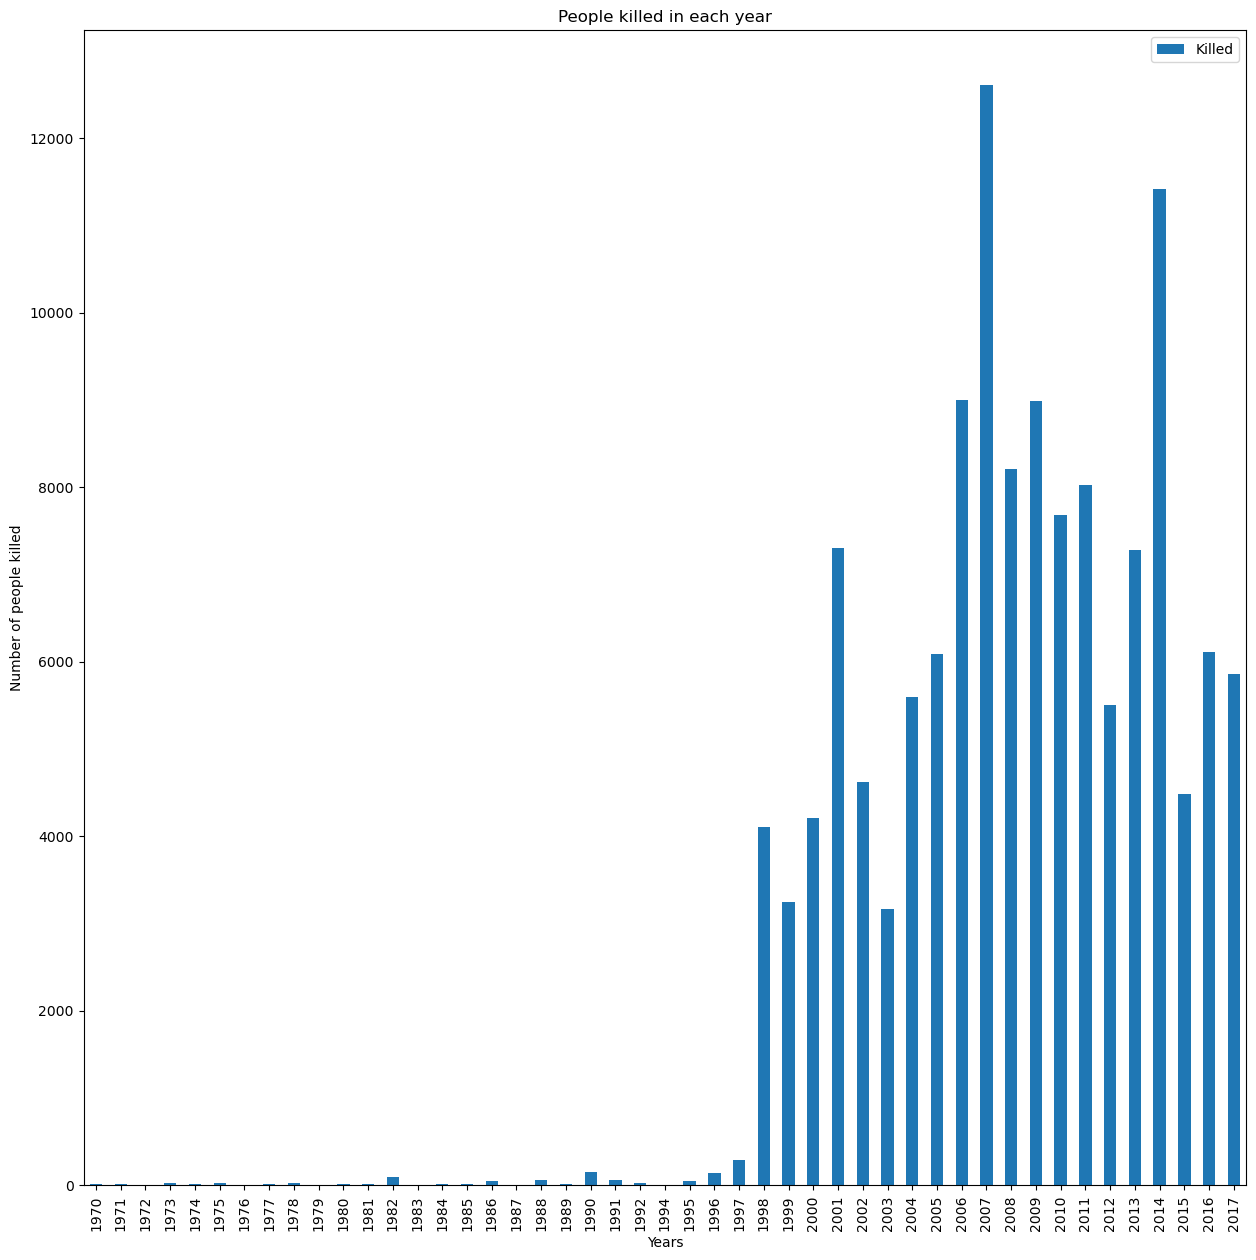

In [131]:
data[["Year","Killed"]].groupby("Year").sum().plot(kind = 'bar',figsize=(15,15))
plt.title('People killed in each year')
plt.xlabel("Years")
plt.ylabel("Number of people killed")
plt.show()

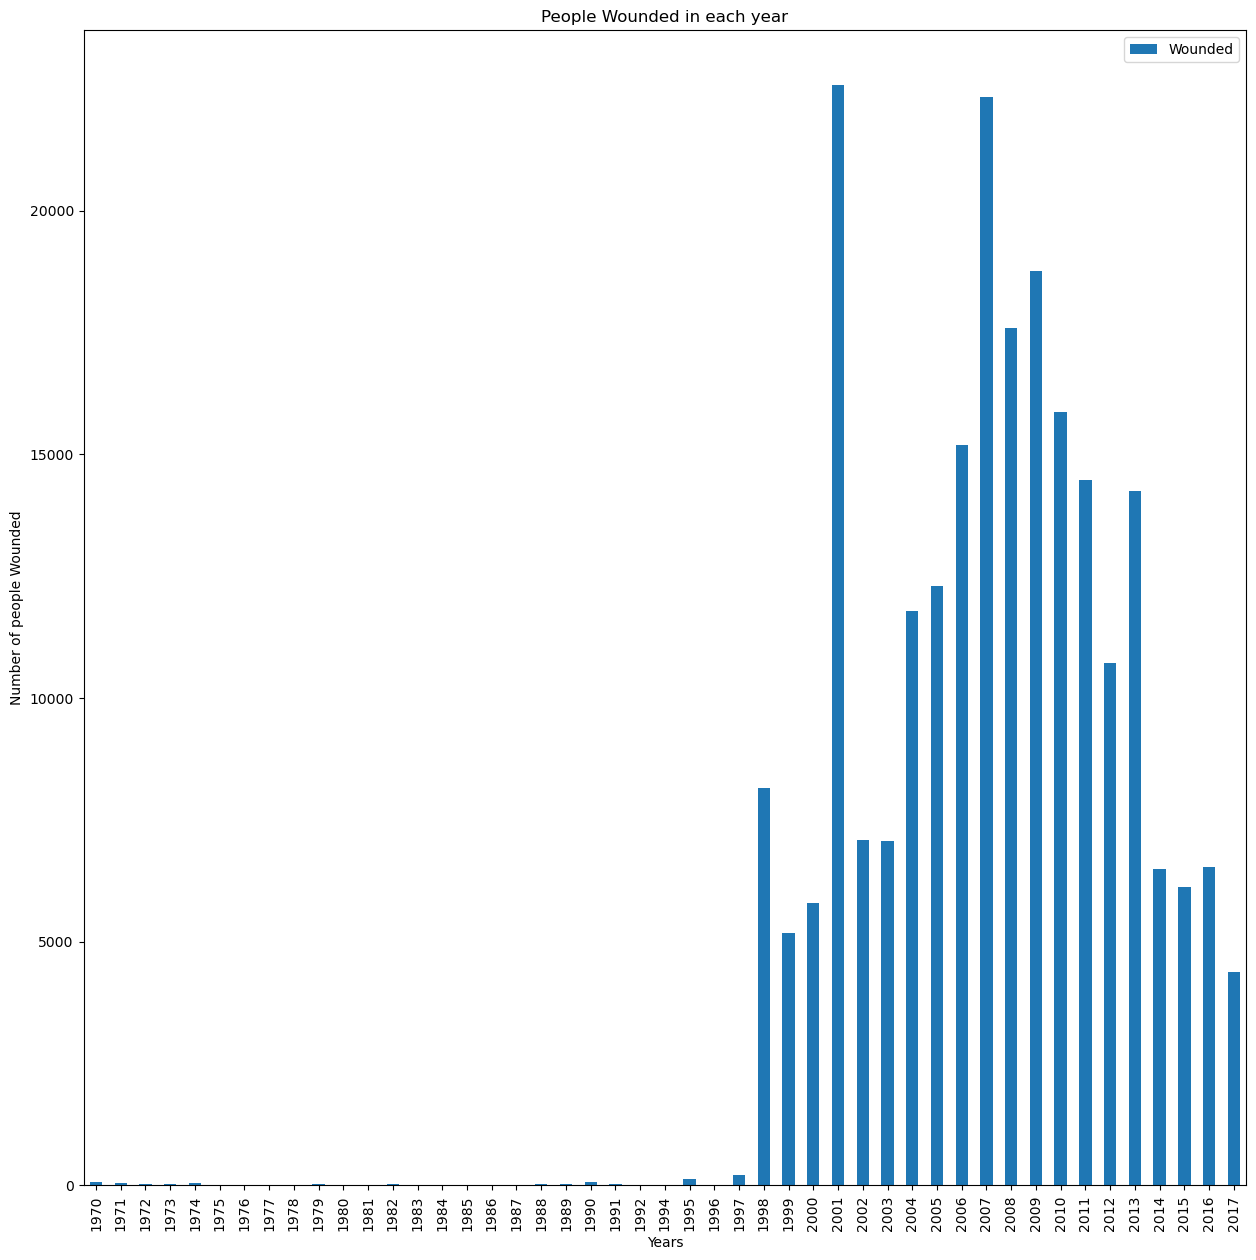

In [132]:
data[["Year","Wounded"]].groupby("Year").sum().plot(kind = 'bar',figsize=(15,15))
plt.title('People Wounded in each year')
plt.xlabel("Years")
plt.ylabel("Number of people Wounded")
plt.show()

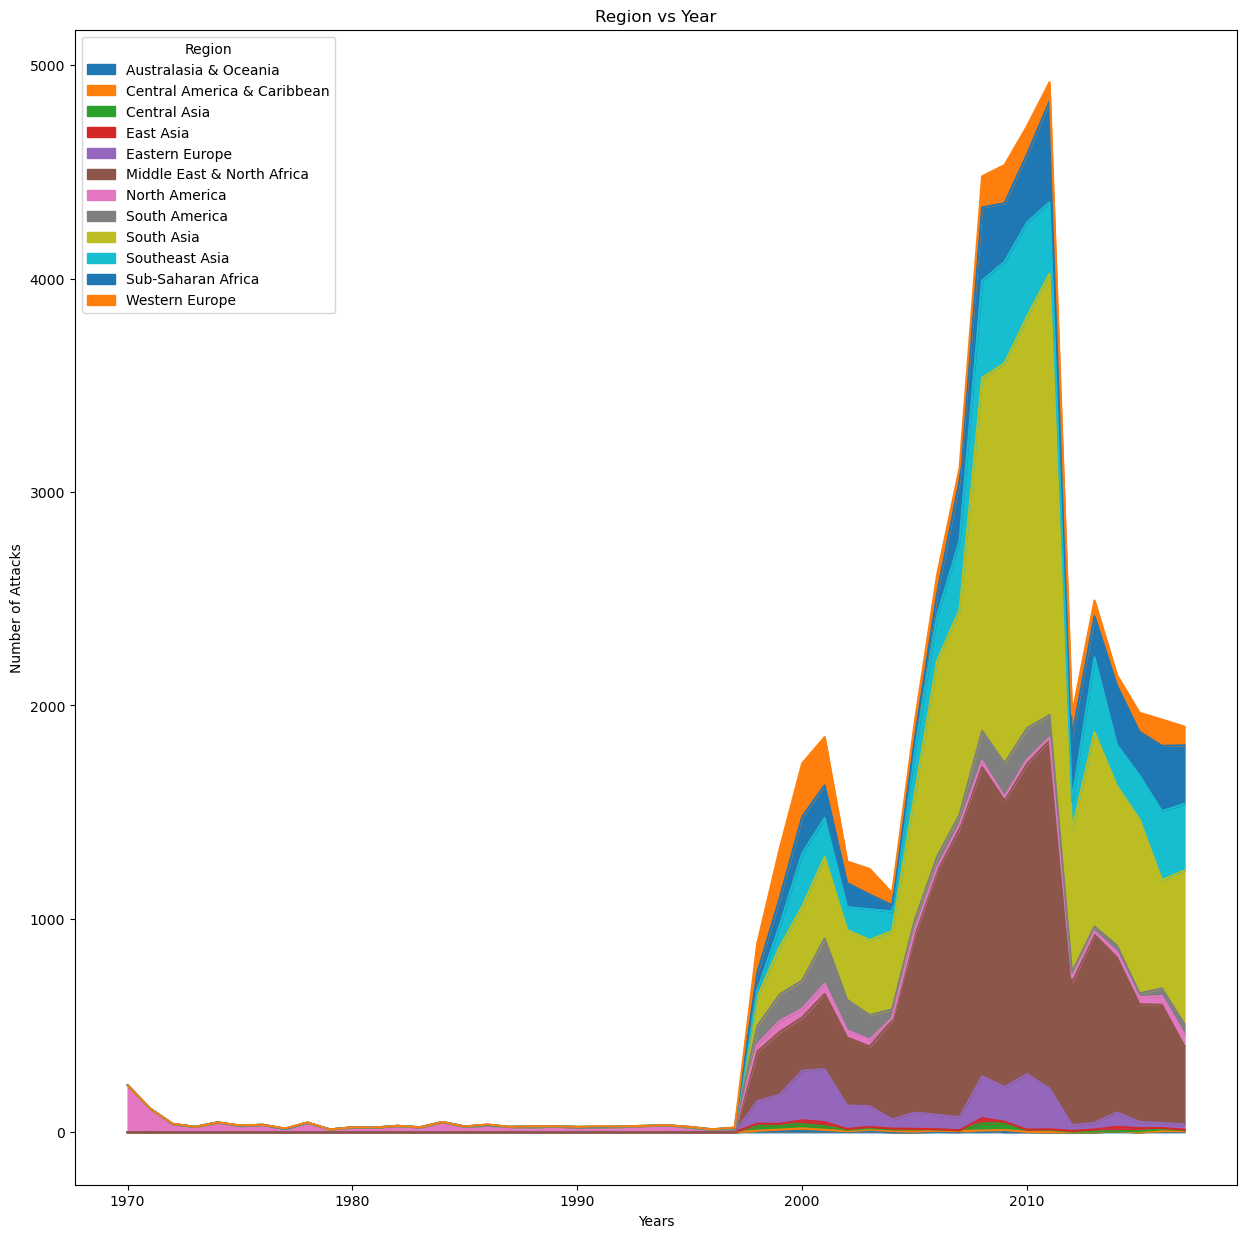

In [133]:
pd.crosstab(data['Year'],data['Region']).plot(kind = 'area',figsize=(15,15))
plt.title('Region vs Year')
plt.xlabel("Years")
plt.ylabel("Number of Attacks")
plt.show()

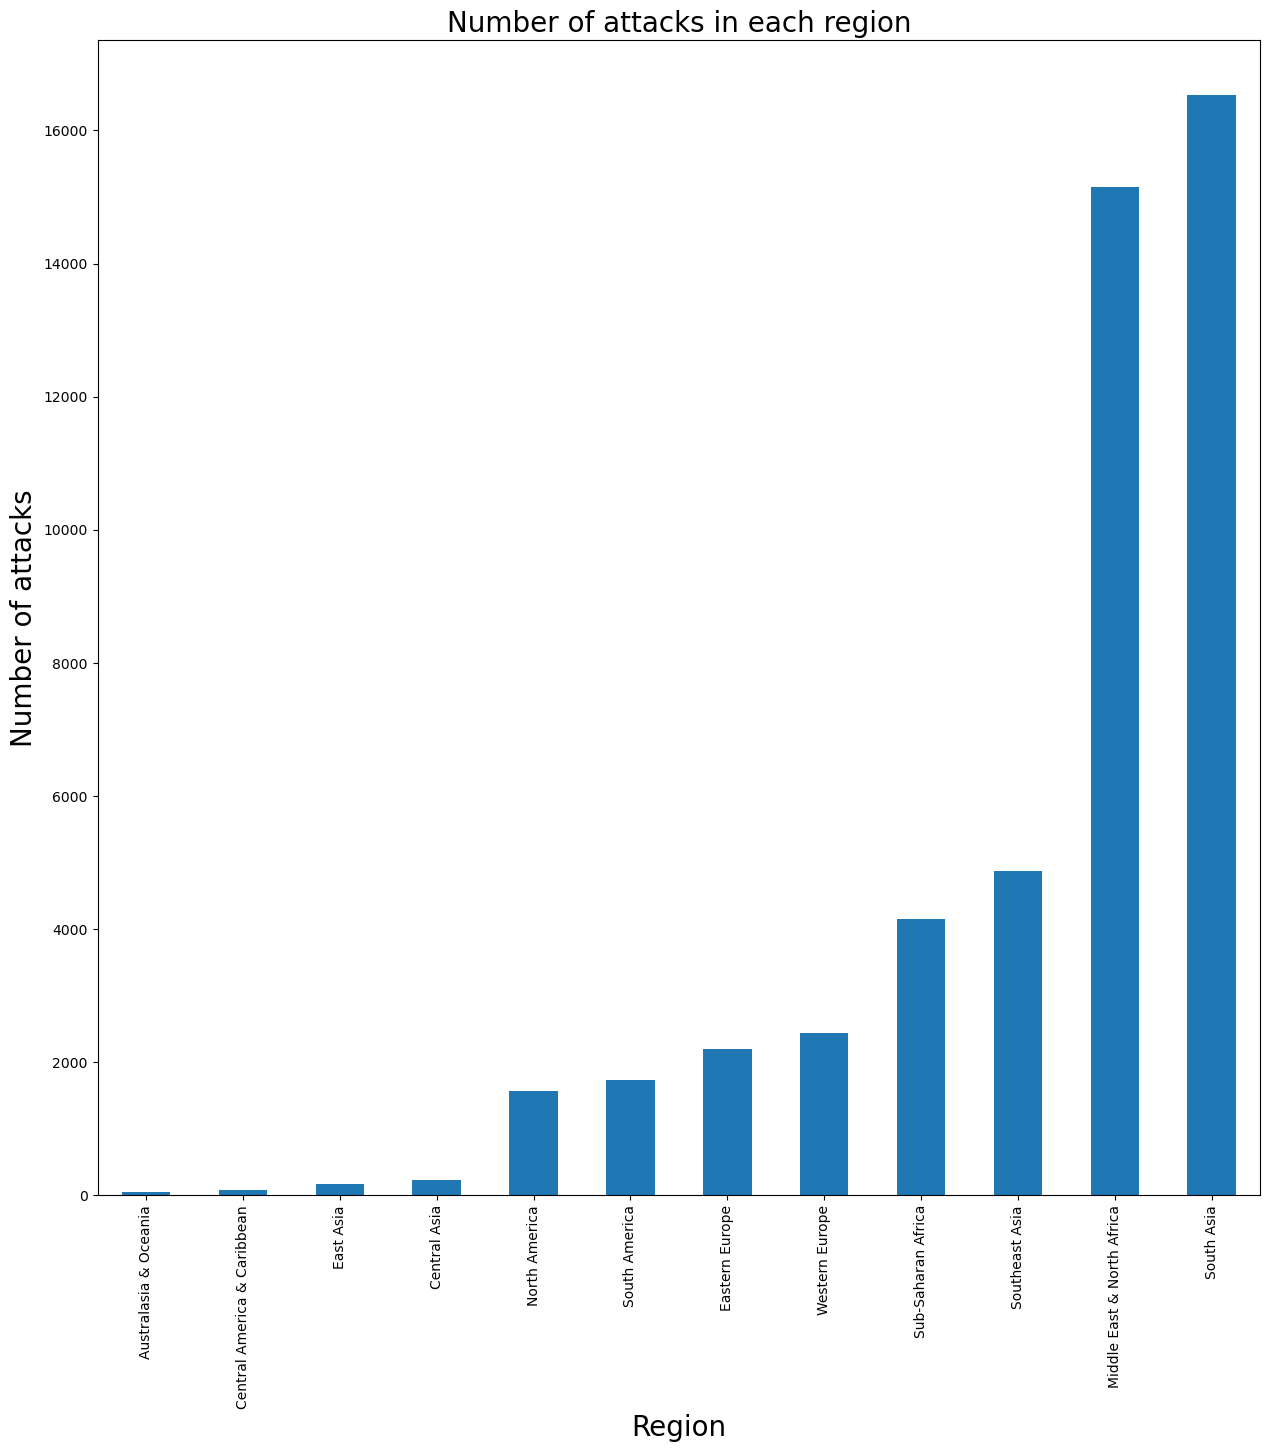

In [134]:
pd.crosstab(data['Year'],data['Region']).sum().sort_values().plot(kind = 'bar',figsize=(15,15))
plt.title('Number of attacks in each region',fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

In [141]:
ci = data.city.value_counts()[:10]
ci

Baghdad      3742
Unknown      1489
Mosul         961
Karachi       720
Kirkuk        547
Mogadishu     514
Baqubah       411
Quetta        384
Athens        358
Peshawar      333
Name: city, dtype: int64

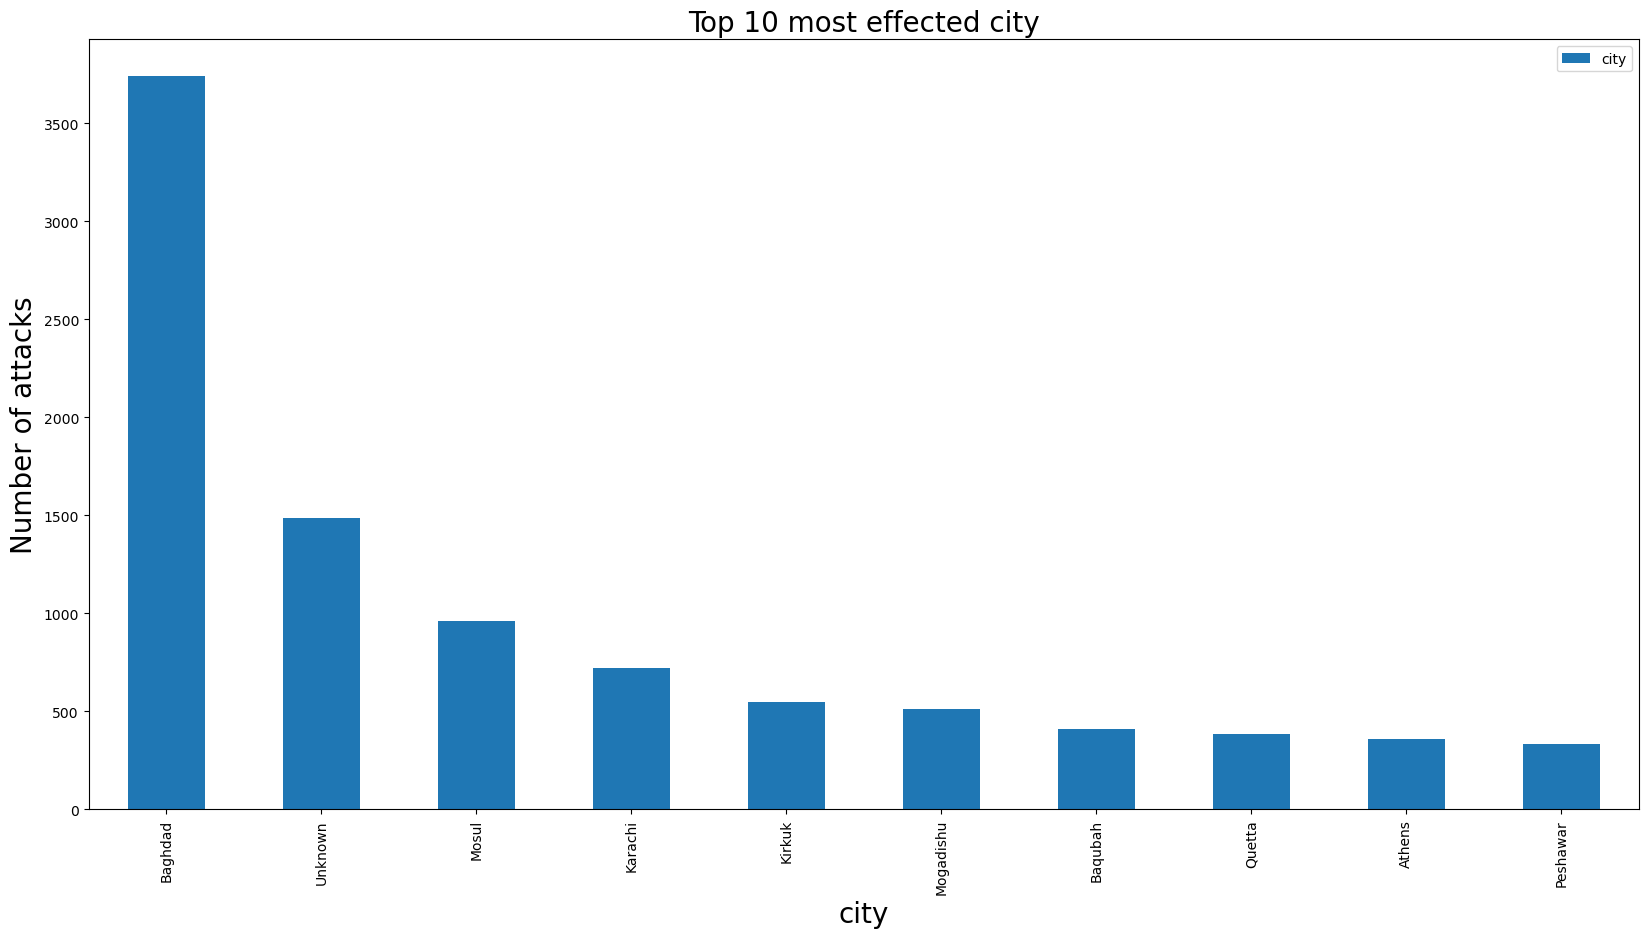

In [135]:
data['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(10).plot(kind = 'bar',figsize=(20,10))
plt.title('Top 10 most effected city',fontsize=20)
plt.xlabel("city",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

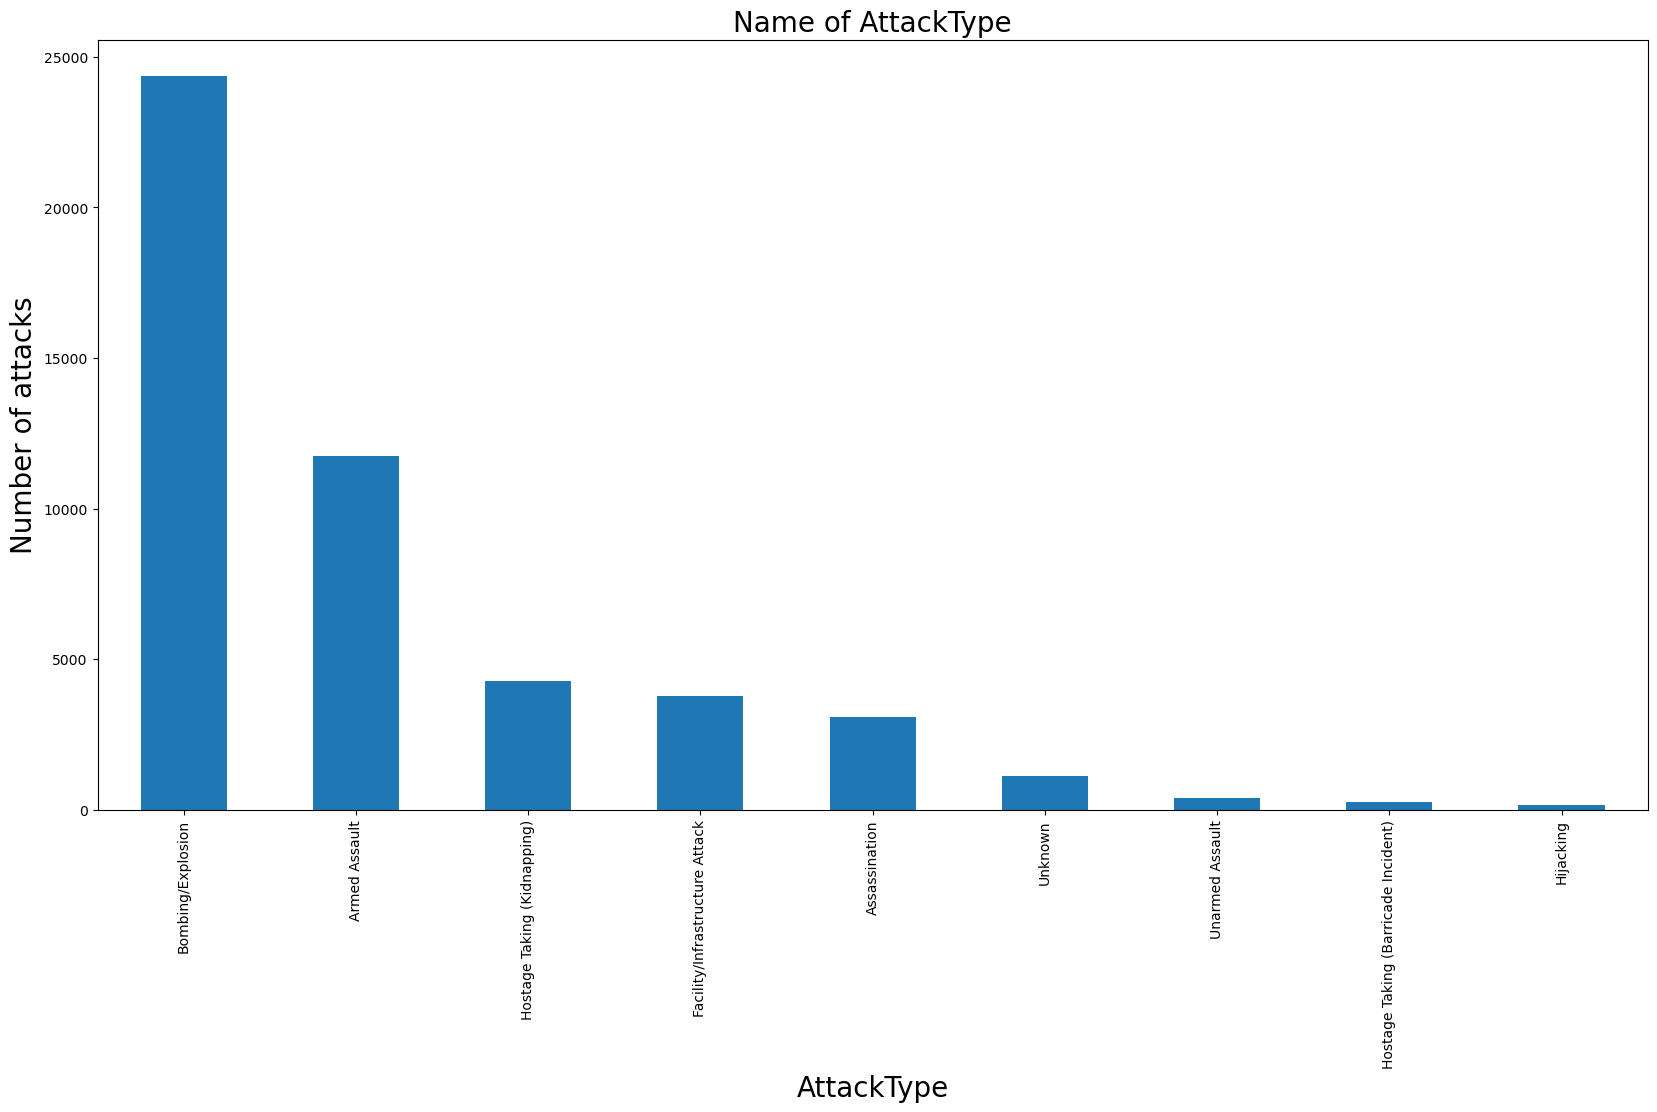

In [143]:
data['AttackType'].value_counts().plot(kind = 'bar',figsize=(20,10))
plt.title('Name of AttackType',fontsize=20)
plt.xlabel("AttackType",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

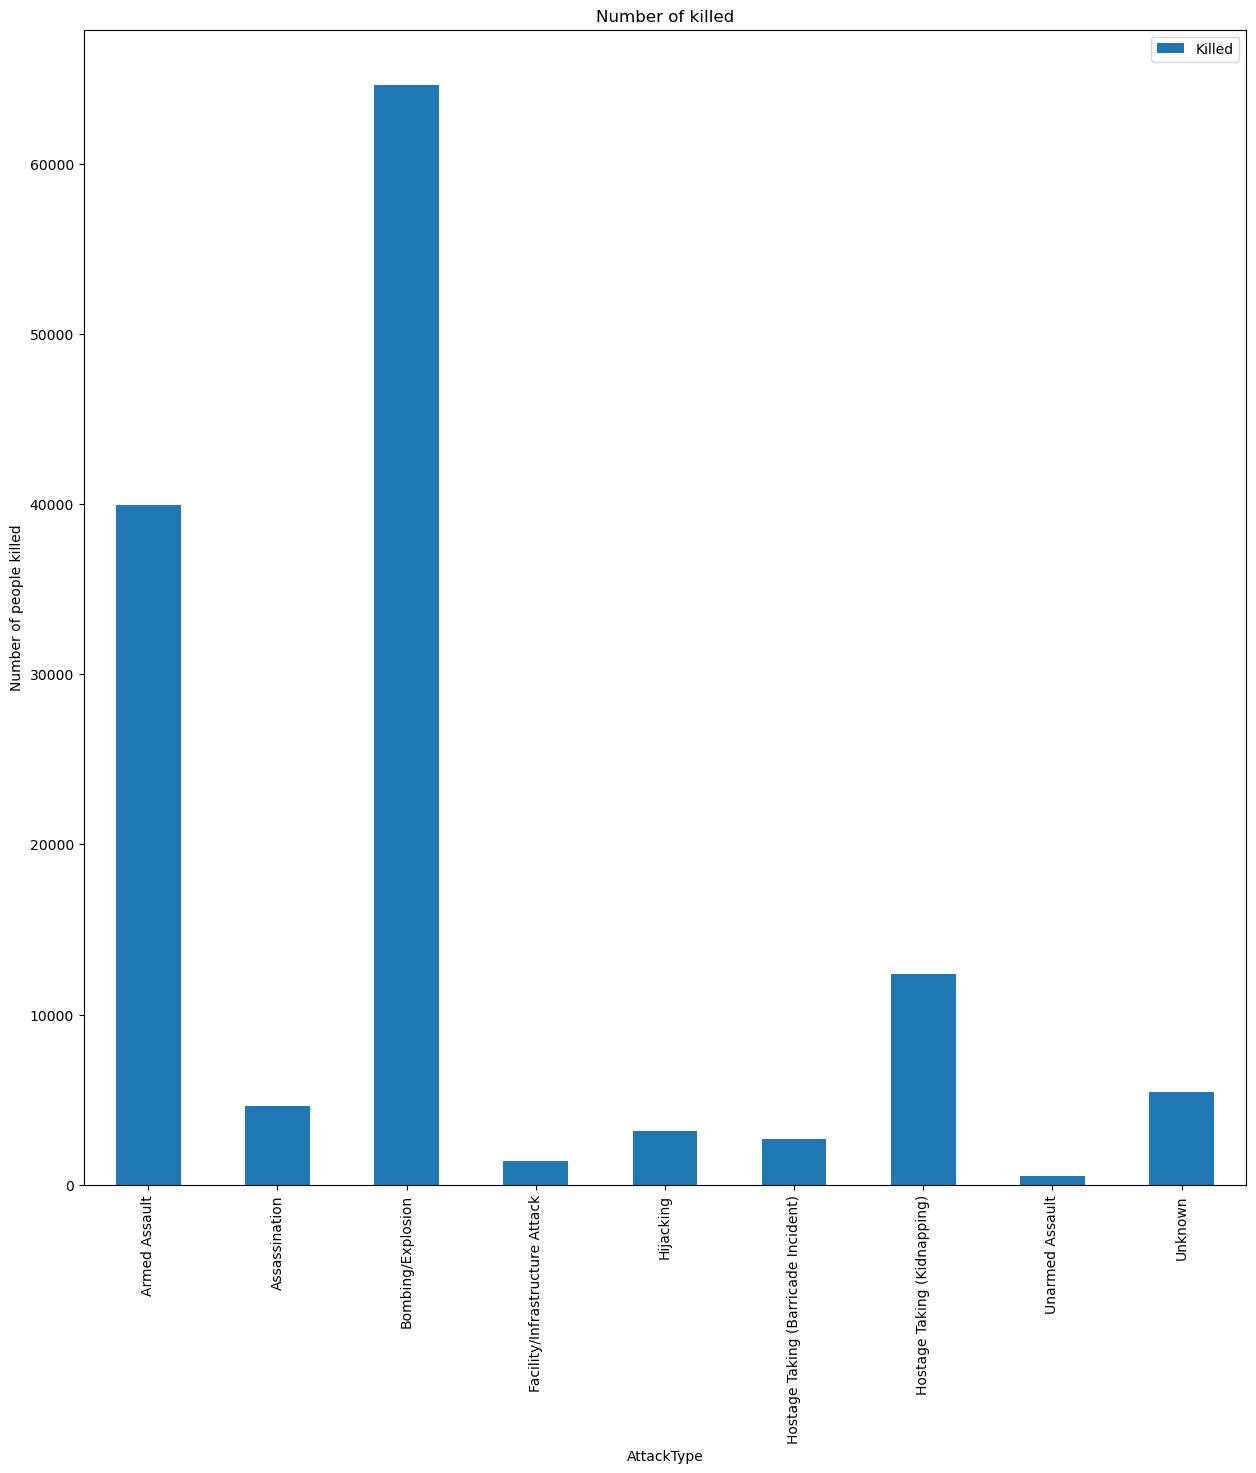

In [142]:
data[["AttackType","Killed"]].groupby("AttackType").sum().plot(kind = 'bar',figsize=(15,15))
plt.title('Number of killed')
plt.xlabel("AttackType")
plt.ylabel("Number of people killed")
plt.show()

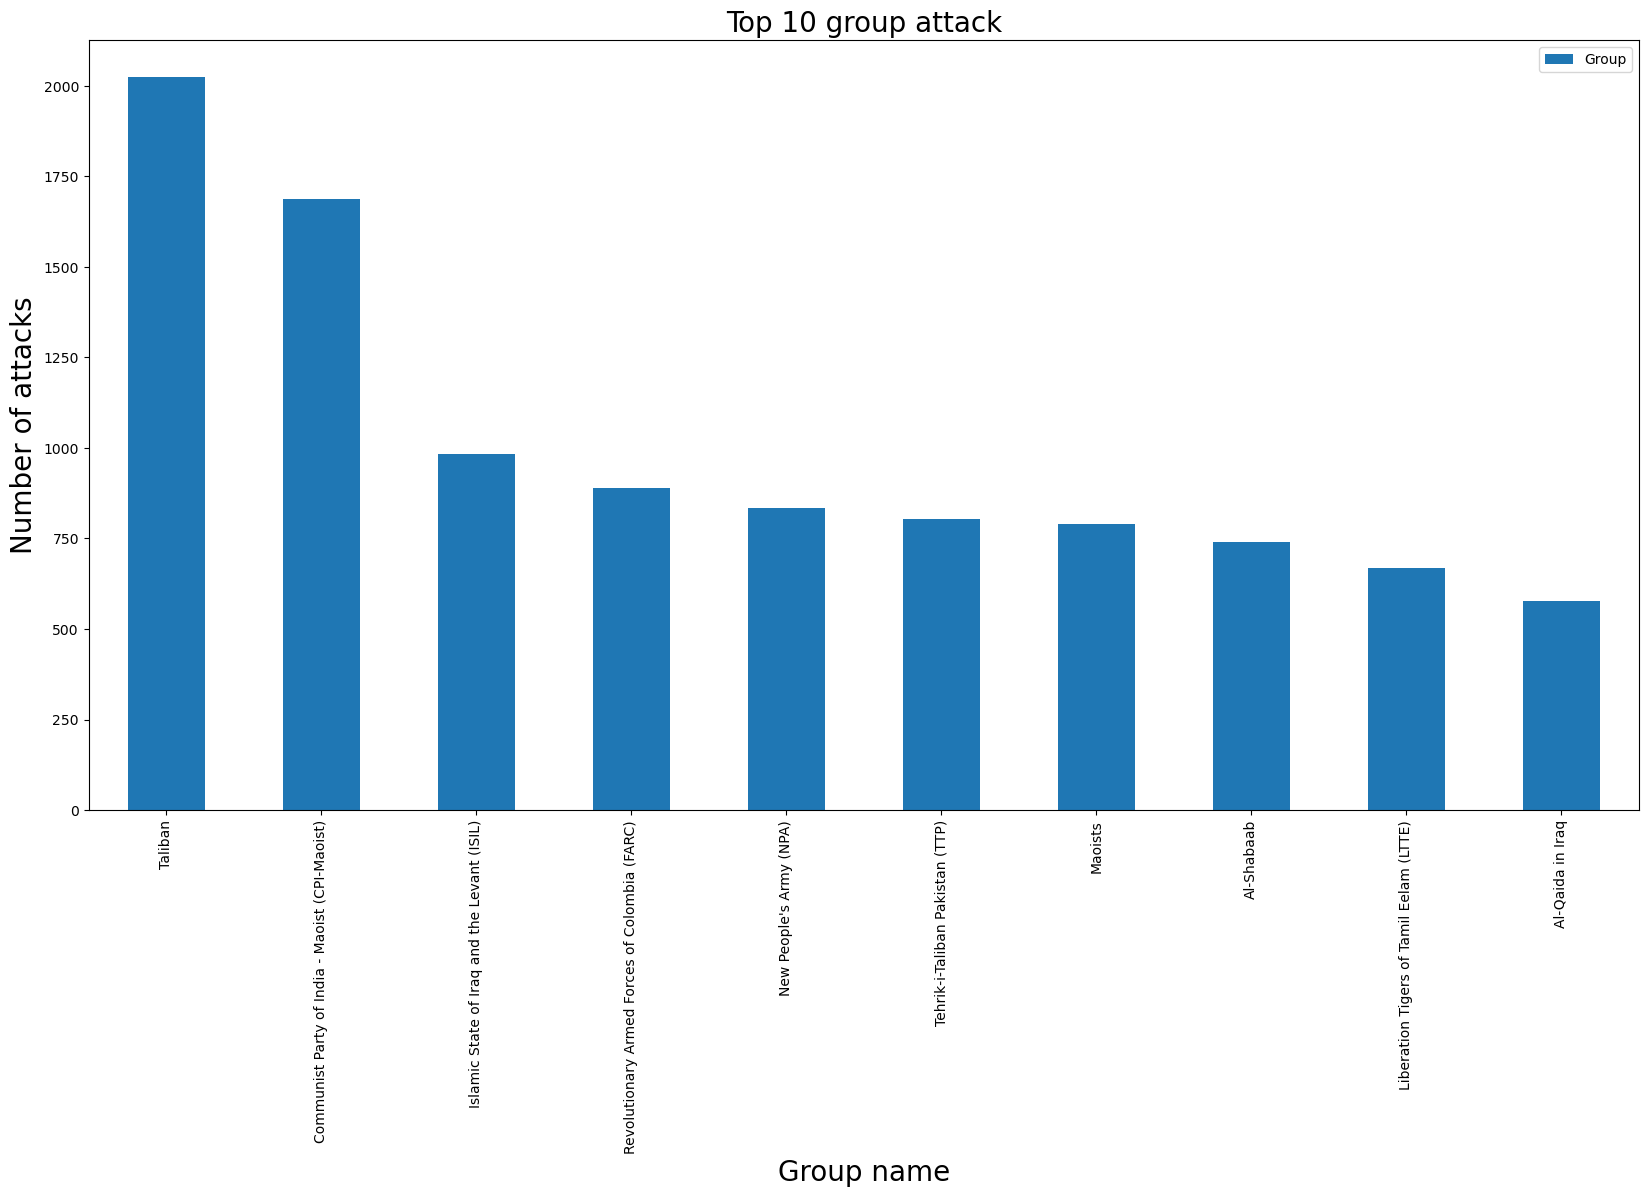

In [138]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind = 'bar',figsize=(20,10))
plt.title('Top 10 group attack',fontsize=20)
plt.xlabel("Group name",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

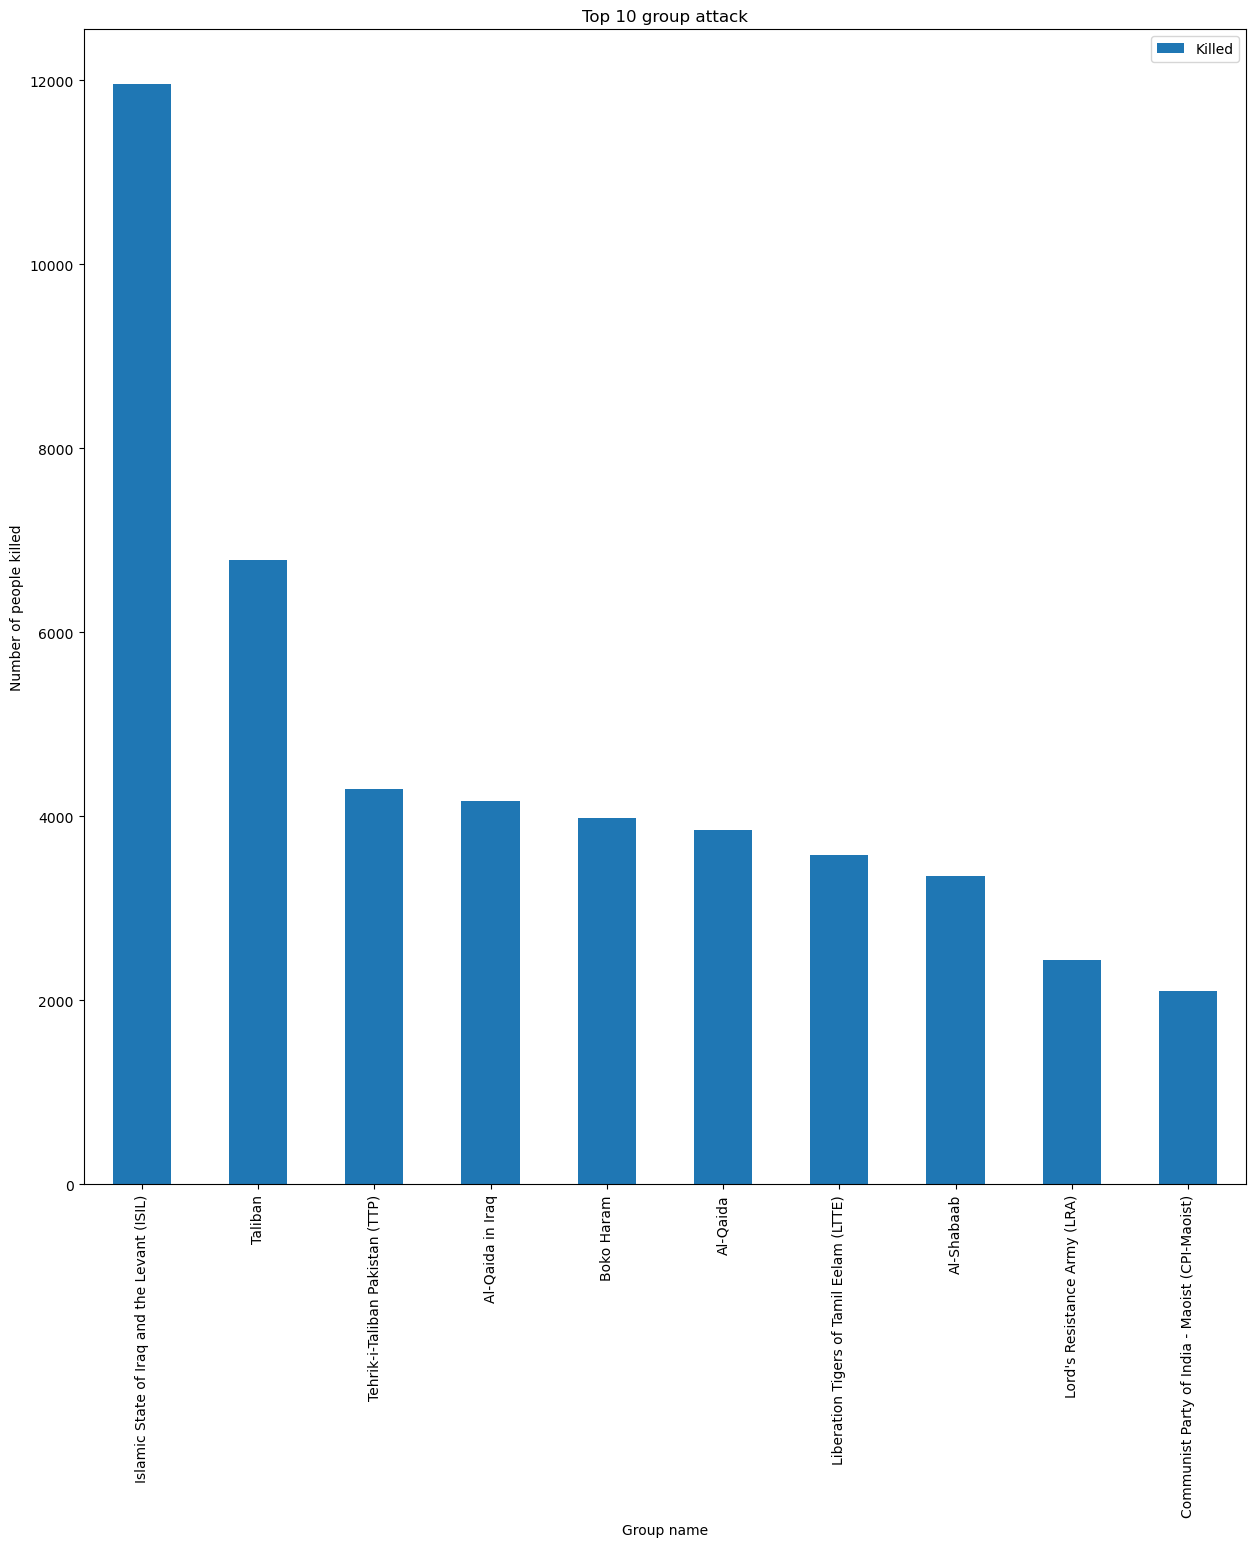

In [139]:
data[["Group","Killed"]].groupby("Group").sum().drop('Unknown').sort_values('Killed',ascending=False).head(10).plot(kind = 'bar',figsize=(15,15))
plt.title('Top 10 group attack')
plt.xlabel("Group name")
plt.ylabel("Number of people killed")
plt.show()

In [140]:
data1=data[['Group','Country','Killed']]
data1=data1.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
data1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9688\440769087.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data1=data1.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)


,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,10192.0
1,Taliban,Afghanistan,6693.0
2,Tehrik-i-Taliban Pakistan (TTP),Pakistan,4292.0
3,Al-Qaida in Iraq,Iraq,4056.0
4,Boko Haram,Nigeria,3703.0
5,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,3548.0
6,Al-Qaida,United States,3001.0
7,Al-Shabaab,Somalia,2595.0
8,Communist Party of India - Maoist (CPI-Maoist),India,2103.0
9,Revolutionary Armed Forces of Colombia (FARC),Colombia,1765.0


## Conclusion
### Iraq is the most affected country with 9347
### The most group attack is Islamic State of Iraq and the Levant (ISIL)	
### Baghdad is the most affected city with 3742
### South Asia is the most affected region
### Most of people killed in the year 2007
### Taliban has the most number of attacks